In [2]:
#importovanie potrebných knižníc
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils import to_categorical
from keras import losses
from keras.optimizers import SGD 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
#načítame dataset
data= pd.read_csv('austin-waste.zip',compression='zip')

In [4]:
#prázdne hodnoty nahradíme 0
data['load_weight'] = data['load_weight'].fillna(0)
#nahradíme desatiné čísla hmotnosti odpadu typom int
float_col = data.select_dtypes(include = ['float64'])
for col in float_col.columns.values:
    data[col] = data[col].astype('int64')

In [5]:
#touto metódou si vytvoríme nový stĺpec, do ktorého budeme vkladať namiesto názvov si vložíme čísla
#keďže údajov je dosť veľa, menej pravdepodobné zoskupenie
def set_value(row_number, assigned_value):
    return assigned_value[row_number]
dictionary={'TDS LANDFILL':1,'BALCONES RECYCLING':2,'HORNSBY BEND':3,'TDS - MRF':4,'ONION CREEK':5,'BRAKER SITE':6,'ON ROUTE HIGH DUMP':7,'ORGANICS BY GOSH':8,'STEINER LANDFILL':9,'MRF':9,'WINNEBAGO':9,'GREAT NORTHERN':9,'WILCAB':9,'BURGER CENTER':9,'PARK CENTER':9,'ELMONT':9,'ZILKER':9,'CLARKSON':9,'PARK BEND':9,'KRAMER':9,'COMMERCIAL METALS':9,'BFI LANDFILL':9,'PEASE PARK':9,'BARTON SKYWAY':9,'INSPIRATION/GUNNISAN':9,'WESTFIELD':9,'AUSTIN WOOD RECYCLING':9,'CYCLED PLASTICS LTD':9,'ST. EDWARDS':9,'BALCONES WOODS':9,'CROSS PARK':9,'LITTER DROPOFF':9,'STEINER LANDFILL':7,'DEEP EDDY PARK':9}
data['dropoff_site_new'] = 
data['dropoff_site'].apply(set_value, 
                           args=(dictionary, ) )

In [6]:
#opäť vytvoríme nový stĺpec, do ktorého budeme vkladať namiesto typu zberu číslo
#znova som menej časté vložila do jedného
def set_value(row_number, assigned_value):
    return assigned_value[row_number]
dictionary={'GARBAGE COLLECTIONS':1,'RECYCLING - SINGLE STREAM':2,'YARD TRIMMING':3,'SWEEPING':4,'BULK':5,'BRUSH':6,'RECYCLING - PAPER':7,'RECYCLING - COMINGLE':7,'DEAD ANIMAL':7,'TIRES':7,'MULCH':7,'MIXED LITTER':7,'LITTER':7,'RECYCLED METAL':7,'BAGGED LITTER':7,'RECYCLING - PLASTIC BAGS':7,'SPECIAL EVENTS':7,'INHOUSE - RECYCLING':7,'STORM':7,'MATTRESS':7,'YARD TRIMMING - X-MAS TREES':7}
data['load_type_new'] = data['load_type'].apply(set_value, args=(dictionary, ) )

In [7]:
#dáta si zoradíme podľa dátumu, aby boli na konci najnovšie údaje
data = data.sort_values('load_time')

In [8]:
#odstránime nepotrebné stĺpce
del data['route_number']
del data['route_type']
del data['load_id']
del data['report_date']

In [9]:
#zobrazíme tabuľku
data.head(10)

,dropoff_site,load_time,load_type,load_weight,dropoff_site_new,load_type_new
32097,MRF,2000-01-26 12:39:00,RECYCLING - PAPER,2940,9,7
151904,TDS LANDFILL,2001-03-16 09:38:00,BULK,4240,1,5
120386,TDS LANDFILL,2001-03-16 13:33:00,BULK,4740,1,5
21854,TDS LANDFILL,2001-10-16 11:51:00,BULK,14080,1,5
367496,TDS LANDFILL,2001-10-16 15:28:00,BULK,8260,1,5
475890,TDS LANDFILL,2004-01-06 11:00:00,BULK,8560,1,5
389153,TDS LANDFILL,2004-02-28 10:31:00,GARBAGE COLLECTIONS,15420,1,1
318367,TDS LANDFILL,2004-02-28 15:11:00,GARBAGE COLLECTIONS,15180,1,1
187609,TDS LANDFILL,2004-08-25 10:46:00,GARBAGE COLLECTIONS,16780,1,1
156445,TDS LANDFILL,2004-08-25 11:48:00,GARBAGE COLLECTIONS,23940,1,1


In [39]:
#trénovacie dáta x obsahujú údaje z roku 2017, vkladáme sem typ odpadu load_type v číselnej hodnote
train_x = data.iloc[536939:,5].values
#trénovacie dáta y obsahujú údaje z roku 2017, vkladáme sem miesto vývozu dropoff_site v číselnej hodnote
train_y = data.iloc[536939:,4].values

#dáta si zmeníme do kategórií
kategoricka_premenna_x = np_utils.to_categorical(train_x)
kategoricka_premenna_y = np_utils.to_categorical(train_y)

array([[0., 1.]], dtype=float32)

In [18]:
model = Sequential()
#vstupná vrstva obsahuje 2 neuróny, input_dim predstavuje 9 kategórií odpadu a aktivačnú funkciu relu. dobré výsledky dosahovala aj aktivačná funkcia sigmoid
model.add(Dense(2, input_dim=8, init='uniform', activation='relu'))
#v skrytej vrstve sa nachádza 80 neurónov, ktoré prechádzajú aktivačnou funkciou elu, dobré výsledky dosahovala aj funkcia tanh
model.add(Dense(50, init='uniform', activation='elu'))
#vo výstupnej vrstve sa nachádza 11 neurónov, keďže máme 10 vývozných miest, a prechádzajú aktivačnou funkciou softmax. Podobné výsledky poskytovala aj funkcia relu
model.add(Dense(10, init='uniform', activation='softmax'))

#na kompliáciu som použila optimizer Adam, ktorý ponúkol najlepšiu presnosť
#pri stratách som použila categorical_crossentropy
model.compile(loss=losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
#priebeh učenia sa ukladá do premennej learning, 10 epoch
learning = model.fit(kategoricka_premenna_x,kategoricka_premenna_y,epochs=10, batch_size=50, verbose=2)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, input_dim=8, activation="relu", kernel_initializer="uniform")`
  app.launch_new_instance()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, activation="elu", kernel_initializer="uniform")`
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="uniform")`


Epoch 1/10
 - 1s - loss: 1.4103 - acc: 0.5002
Epoch 2/10
 - 1s - loss: 0.8212 - acc: 0.7126
Epoch 3/10
 - 1s - loss: 0.6010 - acc: 0.7736
Epoch 4/10
 - 1s - loss: 0.5375 - acc: 0.7793
Epoch 5/10
 - 1s - loss: 0.5290 - acc: 0.7793
Epoch 6/10
 - 1s - loss: 0.5179 - acc: 0.7793
Epoch 7/10
 - 1s - loss: 0.5111 - acc: 0.7789
Epoch 8/10
 - 1s - loss: 0.5077 - acc: 0.7786
Epoch 9/10
 - 1s - loss: 0.5063 - acc: 0.7793
Epoch 10/10
 - 1s - loss: 0.5053 - acc: 0.7793


In [12]:
#vypíšeme presnosť v percentách
scores = model.evaluate(kategoricka_premenna_x,
                        kategoricka_premenna_y)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

27464/27464 [==============================] - 1s 30us/step

Accuracy: 77.93%


In [13]:
#uložíme model učenia
model.save('waste_model.h5')

In [40]:
#do premennej predict_me som vložila každú kategóriu odpadu, výsledkom bude pravdepodobnosť, kam sa takýto odpad zrejme vyvezie
predict_me = np.array([[0, 1, 0, 0, 0, 0, 0, 0],
                       [0, 0, 1, 0, 0, 0, 0, 0],
                       [0, 0, 0, 1, 0, 0, 0, 0],
                       [0, 0, 0, 0, 1, 0, 0, 0],
                       [0, 0, 0, 0, 0, 1, 0, 0],
                       [0, 0, 0, 0, 0, 0, 1, 0],
                       [0, 0, 0, 0, 0, 0, 0, 1]
                      ])
predictions = model.predict(predict_me,batch_size=20,verbose=1)

#vypočítame predikciu a vypíšeme
predictions = model.predict(predict_me)
#nechceme zobrazovať desatiné čísla vo vedeckom formáte, preto suppress = true
np.set_printoptions(suppress=True)
print (predictions)
#najvyššiu predikciu dosahuje prvé miesto vývozu odpadu, keďže sa tam najviac vyváža

7/7 [==============================] - 0s 157us/step
[[0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.55 0.   0.44 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.75 0.   0.   0.11 0.   0.13 0.  ]
 [0.   0.19 0.01 0.01 0.01 0.48 0.04 0.22 0.   0.04]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.7  0.   0.   0.23 0.   0.06 0.  ]
 [0.   0.54 0.   0.14 0.   0.01 0.01 0.01 0.   0.28]]


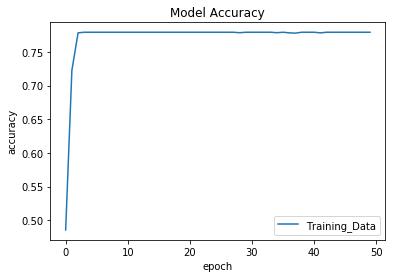

In [15]:
#zobrazíme si prebeh presnosti výpočtov pre 50 epoch
plt.plot(learning.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training_Data'])
plt.show()

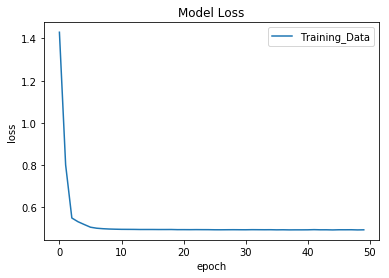

In [16]:
#a priebeh presnosti strát pre 50 epoch
plt.plot(learning.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Data'])
plt.show()

In [44]:
#pre zobrazenie grafov si načítame súbor s dátami iba z roku 2017
data1=pd.read_csv('waste2017.csv',sep=',')

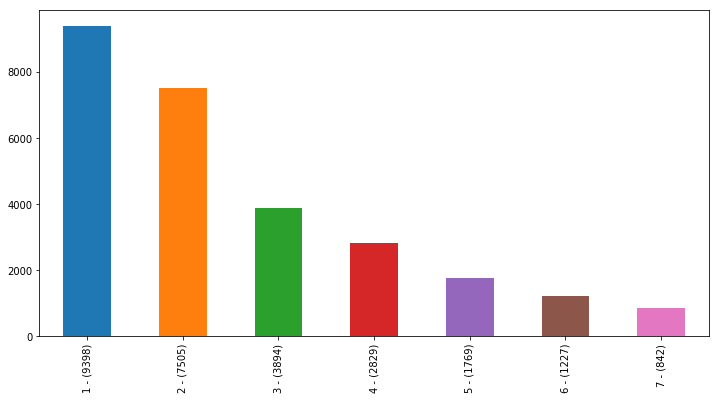

In [46]:
plt.figure(figsize=(12,6))
#v grafe sú zobrazené všetky druhy vývozu v závislosti od množstva záznamov, zmenou stĺpca za 'load_type_new' si môžeme overiť, že kategorizácia dát do 7 skupín zachováva pomer - v zmysle, posledná skupina pozostávajúca z viacerých kategórií nepresiahne veľkosť predposlednej kategórie
load_type_counts = data1['load_type'].value_counts()
ax1 = load_type_counts.plot(kind='bar');
labels = []
for i, label in enumerate(load_type_counts.index):
    labels.append('{} - ({})'.format(label, load_type_counts[label]))
ax1.set_xticklabels(labels);

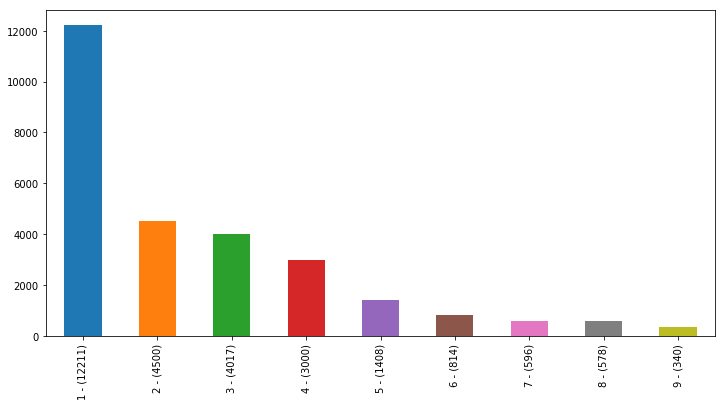

In [51]:
plt.figure(figsize=(12,6))
#v grafe sú zobrazené všetky destinácie vývozu v závislosti od množstva záznamov, opäť si môžeme zmeniť stĺpec za 'dropoff_site_new', pre overenie správnej kategorizácie 
load_type_counts = data1['dropoff_site'].value_counts()
ax1 = load_type_counts.plot(kind='bar');
labels = []
for i, label in enumerate(load_type_counts.index):
    labels.append('{} - ({})'.format(label, load_type_counts[label]))
ax1.set_xticklabels(labels);